# Adding Dependences

In [161]:
using DelimitedFiles
using Plots
include("../../init/extract_info.jl")

plot_compare (generic function with 1 method)

In [162]:
k = 0.07
range_corr = 0.8
ext_value = false

false

In [163]:
id = Float64.(readdlm("T_150000/rmax_3.5_s_1.9/k_$(k)/Test_Initial.xyz")[3:end,1])
X_f = Float64.(readdlm("T_150000/rmax_3.5_s_1.9/k_$(k)/Test_Final.xyz")[3:end,2:4])

# Finding the center of mass
X_center = sum(X_f, dims=1)./ size(X_f[:,1])

# # Moving two aggregates to the center of mass
X_f = X_f - repeat(X_center ,size(X_f)[1])

# Cilindrical Coordinates
X_f_cil = zeros(size(X_f)[1],3)
X_f_cil[:,1] = sqrt.(sum(X_f .^ 2, dims=2))
X_f_cil[:,2:3]  = mod.(atan.(X_f[:,2:3] ./ X_f[:,1]) .+ pi .* (X_f[:,1] .< 0), 2*pi);

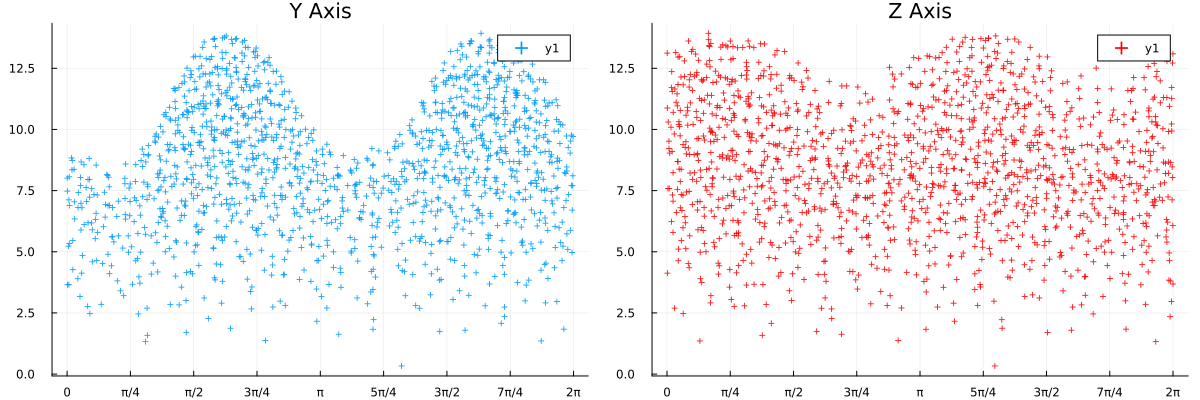

In [164]:
p1 = scatter(
    X_f_cil[:,2], 
    X_f_cil[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    xticks = (0:pi/4:2*pi, ["0","π/4","π/2","3π/4","π","5π/4","3π/2","7π/4","2π"])
)

p2 = scatter(
    X_f_cil[:,3], 
    X_f_cil[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    mc=:red,
    xticks = (0:pi/4:2*pi, ["0","π/4","π/2","3π/4","π","5π/4","3π/2","7π/4","2π"])
)

plot!(p1, p2,
    size=(1200,400),
    title=["Y Axis" "Z Axis"]
)

In [165]:
if ext_value
    X_f_cil = X_f_cil[abs.(X_f_cil[:,1] .- findmax(X_f_cil[:,1])[1]) .> 0.5,:]
end
# corr = X_f_cil[findmax(X_f_cil[:,1])[2],2:3] .- pi/2
corr = X_f_cil[findmax(X_f_cil[:,1])[2],2:3]
corr_mat = repeat(corr', size(X_f_cil,1))

X_f_cil[:,2:3] = mod.(X_f_cil[:,2:3] - corr_mat, 2*pi);

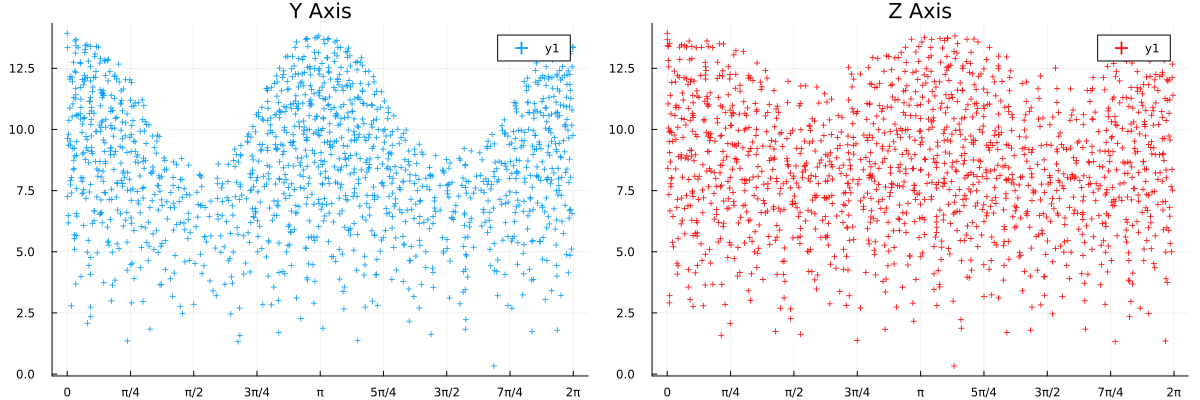

In [166]:
p1 = scatter(
    X_f_cil[:,2], 
    X_f_cil[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    xticks = (0:pi/4:2*pi, ["0","π/4","π/2","3π/4","π","5π/4","3π/2","7π/4","2π"])
)

p2 = scatter(
    X_f_cil[:,3], 
    X_f_cil[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    mc=:red,
    xticks = (0:pi/4:2*pi, ["0","π/4","π/2","3π/4","π","5π/4","3π/2","7π/4","2π"])
)

plot!(p1, p2,
    size=(1200,400),
    title=["Y Axis" "Z Axis"]
)

In [167]:
X_func = zeros(size(X_f_cil))
X_func[:,1] = X_f_cil[:,1]
X_func[:,2:3] = cos.(2 .* X_f_cil[:,2:3])

1492×2 Matrix{Float64}:
  0.258453   -0.973889
  0.0331103  -0.960877
 -0.232391   -0.959311
  0.23119    -0.970767
 -0.0141049  -0.625302
 -0.234693   -0.707967
 -0.550279   -0.749046
  0.259367   -0.546884
  0.03815     0.107106
 -0.224832   -0.111339
 -0.516501   -0.275675
  0.122281    0.867597
 -0.204406    0.661326
  ⋮          
  0.42427    -0.78461
 -0.681229   -0.619012
 -0.517054   -0.897114
 -0.133647   -0.939556
  0.449377   -0.701088
 -0.821914   -0.8642
 -0.539627   -0.997613
  0.295943   -0.760032
  0.570558   -0.574476
 -0.538311   -0.960713
  0.0890813  -0.778028
  0.443668   -0.600228

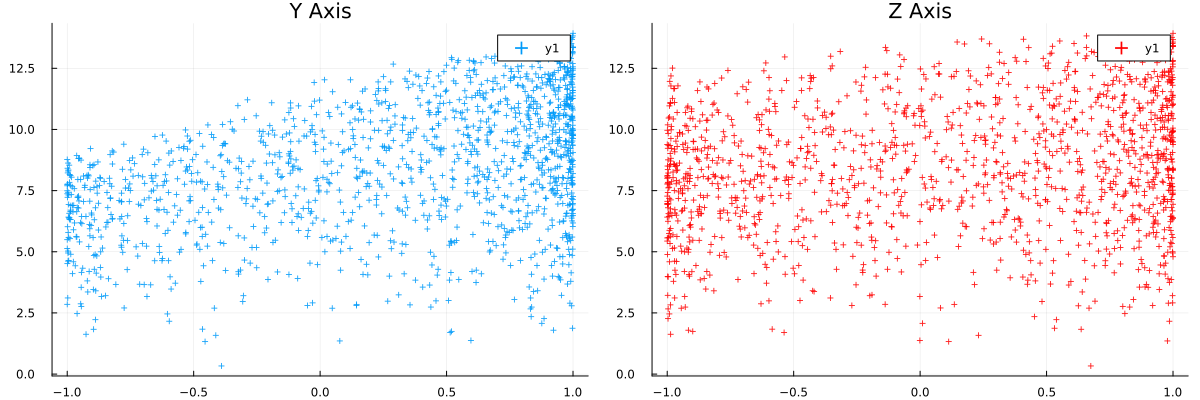

In [168]:
p1 = scatter(
    X_func[:,2], 
    X_func[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
)

p2 = scatter(
    X_func[:,3], 
    X_func[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    mc=:red,
)

plot!(p1, p2,
    size=(1200,400),
    title=["Y Axis" "Z Axis"]
)

In [169]:
r_a = findmax(X_func[X_func[:,2] .< -0.99,:][:,1])[1]
r_b = findmax(X_func[X_func[:,2] .> 0.99,:][:,1])[1]

13.92981987509038

In [170]:
A = (r_a - r_b)/2
B = (r_a + r_b)/2

11.350438280191934

In [171]:
Max = B + A
Min = B - A
hcat(Max, Min)

1×2 Matrix{Float64}:
 8.77106  13.9298

In [172]:
x_cos = collect(0:pi/16:2*pi)
y_cos = A * cos.(2 .* x_cos) .+ B
x_cos = mod.(x_cos .- pi/2, 2*pi)

33-element Vector{Float64}:
 4.71238898038469
 4.908738521234052
 5.105088062083414
 5.301437602932776
 5.497787143782138
 5.6941366846315
 5.890486225480862
 6.086835766330224
 0.0
 0.19634954084936207
 0.39269908169872414
 0.589048622548086
 0.7853981633974483
 ⋮
 2.552544031041707
 2.7488935718910685
 2.945243112740431
 3.141592653589793
 3.3379421944391554
 3.5342917352885177
 3.730641276137879
 3.9269908169872414
 4.123340357836604
 4.319689898685965
 4.516039439535327
 4.71238898038469

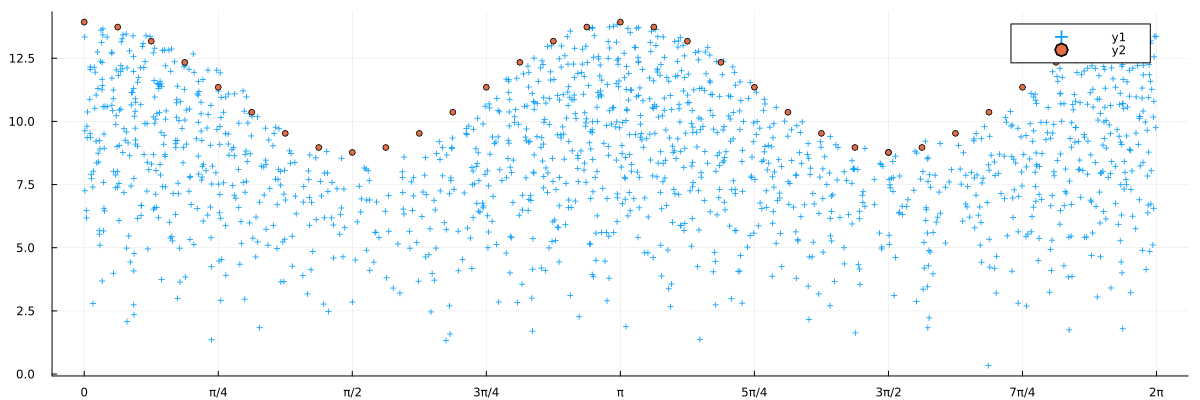

In [173]:
p1 = scatter(
    [X_f_cil[:,2], x_cos], 
    [X_f_cil[:,1], y_cos],  
    shape=[:+ :o :utri], 
    markersize=3,
    xticks = (0:pi/4:2*pi, ["0","π/4","π/2","3π/4","π","5π/4","3π/2","7π/4","2π"])
)

plot!(p1,
    size=(1200,400),
)

In [174]:
# around the Z-axis would be
#     |cos θ   −sin θ   0| |x|   |x cos θ − y sin θ|   |x'|
#     |sin θ    cos θ   0| |y| = |x sin θ + y cos θ| = |y'|
#     |  0       0      1| |z|   |        z        |   |z'|

# around the Y-axis would be
#     | cos θ    0   sin θ| |x|   | x cos θ + z sin θ|   |x'|
#     |   0      1       0| |y| = |         y        | = |y'|
#     |−sin θ    0   cos θ| |z|   |−x sin θ + z cos θ|   |z'|

# around the X-axis would be
#     |1     0           0| |x|   |        x        |   |x'|
#     |0   cos θ    −sin θ| |y| = |y cos θ − z sin θ| = |y'|
#     |0   sin θ     cos θ| |z|   |y sin θ + z cos θ|   |z'|

In [175]:
# mat_z = [ cos(corr[1]) -sin(corr[1]) 0 ; sin(corr[1])  cos(corr[1]) 0 ; 0 0 1 ]
# mat_y = [ cos(corr[2]) 0 sin(corr[2]); 0 1 0 ; -sin(corr[2]) 0  cos(corr[2]) ]

# Rot = mat_z * mat_y
# X_f_2 = (Rot * X_f')';

# Rotating final conditions

In [176]:
# p1 = scatter(
#     X_f[:,2], 
#     X_f[:,1],  
#     shape=[:+ :o :utri], 
#     markersize=3,
#     # xticks = 0:pi/4:2*pi
# )

# p2 = scatter(
#     X_f[:,3], 
#     X_f[:,1],  
#     shape=[:+ :o :utri], 
#     markersize=3,
#     mc=:red,
#     # xticks = 0:pi/4:2*pi
# )
# p3 = scatter(
#     X_f_2[:,2], 
#     X_f_2[:,1],  
#     shape=[:+ :o :utri], 
#     markersize=3,
#     # xticks = 0:pi/4:2*pi
# )

# p4 = scatter(
#     X_f_2[:,3], 
#     X_f_2[:,1],  
#     shape=[:+ :o :utri], 
#     markersize=3,
#     mc=:red,
#     # xticks = 0:pi/4:2*pi
# )
# plot!(p1, p2, p3,p4,
#     size=(1200,1200),
#     title=["Y Axis(Before)" "Z Axis(Before)" "Y Axis(After)" "Z Axis(After)"],
#     layout = 4
# )

In [177]:
# open("TEST_Rotate.xyz"; write=true) do f
#     write(f, "$(size(X_f_2, 1))\n")
#     write(f, "Rotate Testing\n")
#     writedlm(f,hcat(id, X_f_2), ' ')
# end

In [178]:
# run(`paraview T_150000/rmax_3.5_s_1.9/k_$(k)/Test_Initial.xyz T_150000/rmax_3.5_s_1.9/k_$(k)/Test_Final.xyz TEST_Rotate.xyz`)